In [1]:
features = read.csv("~/github/NovelProject/features_ch.csv")
head(features)

,file_id,genre,file_id_name,textlength,kl_score,ttr_mean,ttr_sd,ttr_norm,ttr_cumsum,ent_mean,ellip.h,dist_cos_mean,dist_cos_sd,dist_cos_cumsum,cross_half_l2,cross_half_tfidf,cross_half_l2_nostopword,cross_half_tfidf_nostopword,thought,pronoun_first,pronoun_third
1,1001,Romantic,R_dig_001.txt,5419,0.1763428,0.5188834,0.03248108,-0.04587521,0.882,5.016573,⋯,0.1336838,0.04605791,1.468853,0.1185552,0.9577324,0.1732744,0.9788745,0.001639344,0.0284153,0.009289617
2,1002,Romantic,R_dig_002.txt,4471,0.1082782,0.4656326,0.0434968,-0.0448747,0.408,4.887354,⋯,0.1463227,0.05333859,1.385438,0.1291271,0.9489182,0.1927675,0.9736983,0.006082725,0.04896594,0.01186131
3,1003,Romantic,R_dig_003.txt,6082,0.1378331,0.4775763,0.03367427,-0.05500763,0.394,4.945124,⋯,0.144415,0.05018635,1.368062,0.1169399,0.9458537,0.1855454,0.9767491,0.006430102,0.004524887,0.04072398
4,1004,Romantic,R_dig_004.txt,2310,0.1086046,0.4467593,0.04410315,-0.02176505,0.668,4.898274,⋯,0.20201,0.07378335,1.476288,0.163863,0.9506353,0.2612766,0.9799587,0.006940428,0.002891845,0.05552342
5,1005,Romantic,R_dig_005.txt,7889,0.1583101,0.4906233,0.03425563,-0.041581,0.502,4.936561,⋯,0.1116377,0.02914219,1.261707,0.1013041,0.9554575,0.1514205,0.9797919,0.004813692,0.03333928,0.0260296
6,1006,Romantic,R_dig_006.txt,2161,0.06768507,0.5083979,0.02035653,-0.03200904,0.362,4.964745,⋯,0.2193924,0.07618105,1.707595,0.1753754,0.96934,0.2682329,0.9845488,0.005167959,0,0.03552972


Let's look at the features one set at a time, and see which of them could be useful. Ideally, the features should not be correlated with the text length, that is, if we only see a part of a novel, the features calculated on the available part should be close to the ones calculated on the entire novel.

## cross-half score
We divide each novel into 20 chunks of equal length, measure the pairwise distances between the first 10 chunks and the last 10 chunks, and then take the average of the 100 distances as cross-half score. The distances between two chunks can be defined in different ways. Here we take the follow two:
- The euclidean distance between the word frequency vectors of the two chunks;
- The cosine distance between the TFIDF vectors of the two chunks.

We can also add some variations to the calculation, such as excluding all the stopwords, or including only the words that appear in more than 60% of the chunks. Hopefully, the cross-half score capture the conversion of the text between the first and second half. 

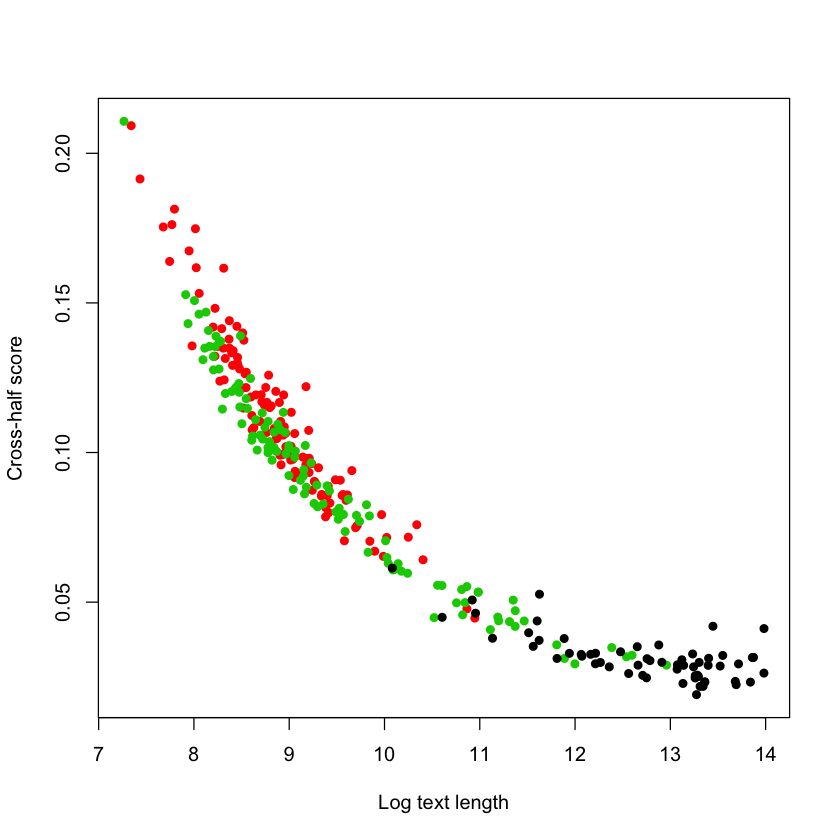

In [3]:
plot(log(features$textlength),features$cross_half_l2,pch=16,col=features$genre,xlab="Log text length",ylab="Cross-half score")

As we see here, the cross-half score are negatively correlated with the text length.

## Chunkwise type-token-ratio

To calculate the chunkwise type-token-ratio, we divide the whole text into chunks of 500 words. The choice of 500 is kind of arbitrary, and just to guarantee that all texts in the corpus contains at least one complete chunk. In this way, each novel will then have some number of chunks, and we compute the type-token-ratio of each chunk, which is the number of unique words in the chunk divided by the chunk size. With many type-token-ratios, we then use 
- the mean,
- the standard deviation,
- the normalized mean, where normalization is carried out by permuations on the words,
- the p values of a cumsum test

as four features of the text. 

To say a few words more about the cumsum test, what we do is 
- substract the mean from the TTRs
- compute the cumulative sums of the TTR sequence
- take the maximum of the absolute values of the cumulative sums as the statistics
- repeat the procedure on numerous random permuations

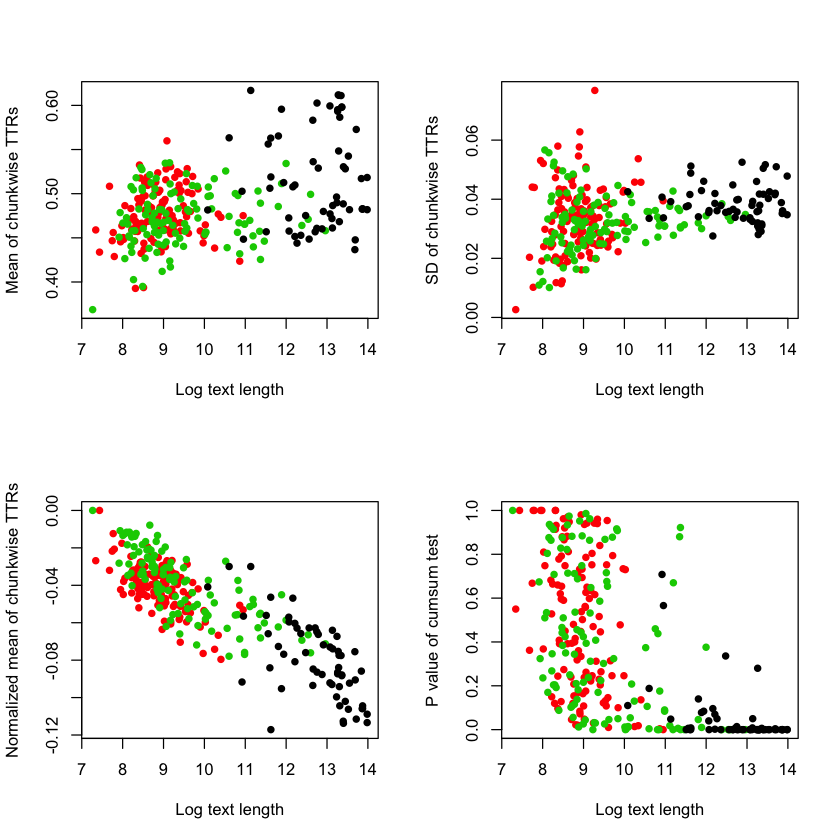

In [4]:
par(mfrow=c(2,2))
plot(log(features$textlength),features$ttr_mean,pch=16,col=features$genre,xlab="Log text length",ylab="Mean of chunkwise TTRs")
plot(log(features$textlength),features$ttr_sd,pch=16,col=features$genre,xlab="Log text length",ylab="SD of chunkwise TTRs")
plot(log(features$textlength),features$ttr_norm,pch=16,col=features$genre,xlab="Log text length",ylab="Normalized mean of chunkwise TTRs")
plot(log(features$textlength),features$ttr_cumsum,pch=16,col=features$genre,xlab="Log text length",ylab="P value of cumsum test")

Among the four plots, it seems that the mean and the standard deviation are the two not that correlated with the length. For example, although the mean of the TTRs seem to be correlated with the text length, the correlation is not as strong within each genre.

In [5]:
cor(log(features$textlength),features$ttr_mean)

[1] 0.3922708

In [6]:
cor(log(features$textlength[features$genre=="Pop"]),features$ttr_mean[features$genre=="Pop"])

[1] 0.03045156

In [7]:
cor(log(features$textlength[features$genre=="Romantic"]),features$ttr_mean[features$genre=="Romantic"])

[1] 0.1386695

In [8]:
cor(log(features$textlength[features$genre=="SR"]),features$ttr_mean[features$genre=="SR"])

[1] 0.1449269

It is not surprising that normalization leads to correlation between the text length and feature. Imagine the most extreme case where there is only one chunk; permuation won't make any difference on the mean TTR, and thus gives a score of 0.

## Chunkwise entropy and conditional entropy

As the same for the chunkwise type-token-ratio, we obtain the entropies and conditional entropies of the resulting chunks. The chunk size is still set to be 500. We use the mean, the standard deviation, the normalized mean (only for the entropy), the cumsum test p value as the measures on the entropy and conditional entropy sequences. The entropy of a piece of text measures the complexity of the usage of word in terms of the unigrams, while the conditional entropy measures the complexity in terms of bigram -- how hard it is to predict the next word if we know the previous one. 
Take a look at the plot against the text length.

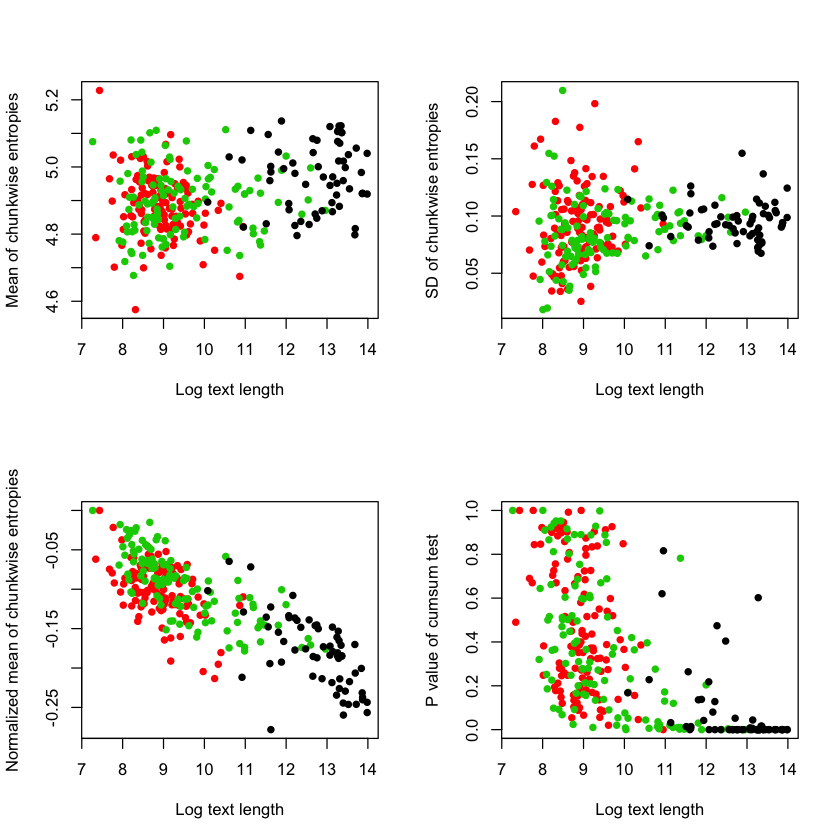

In [9]:
par(mfrow=c(2,2))
plot(log(features$textlength),features$ent_mean,pch=16,col=features$genre,xlab="Log text length",ylab="Mean of chunkwise entropies")
plot(log(features$textlength),features$ent_sd,pch=16,col=features$genre,xlab="Log text length",ylab="SD of chunkwise entropies")
plot(log(features$textlength),features$ent_norm,pch=16,col=features$genre,xlab="Log text length",ylab="Normalized mean of chunkwise entropies")
plot(log(features$textlength),features$ent_cumsum,pch=16,col=features$genre,xlab="Log text length",ylab="P value of cumsum test")

Same story here for the chunkwise entropy as for the chunkwise type-token-ratio, which is expected since entropy is highly correlated with type-token-ratio.

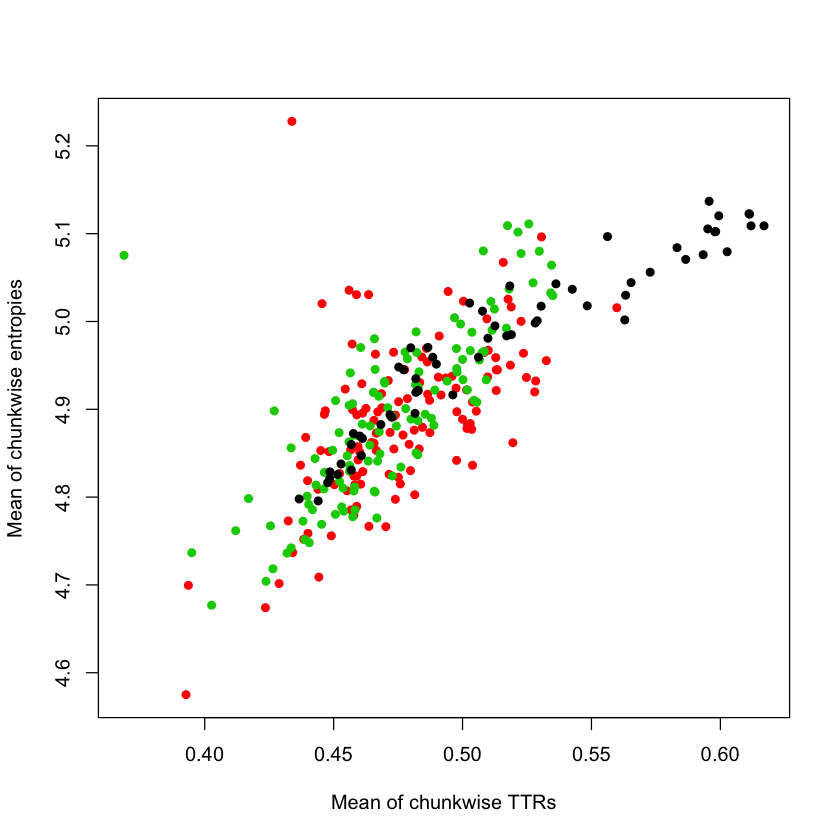

In [11]:
plot(features$ttr_mean,features$ent_mean,pch=16,col=features$genre,xlab="Mean of chunkwise TTRs",ylab="Mean of chunkwise entropies")

Now look at the conditional entropy.

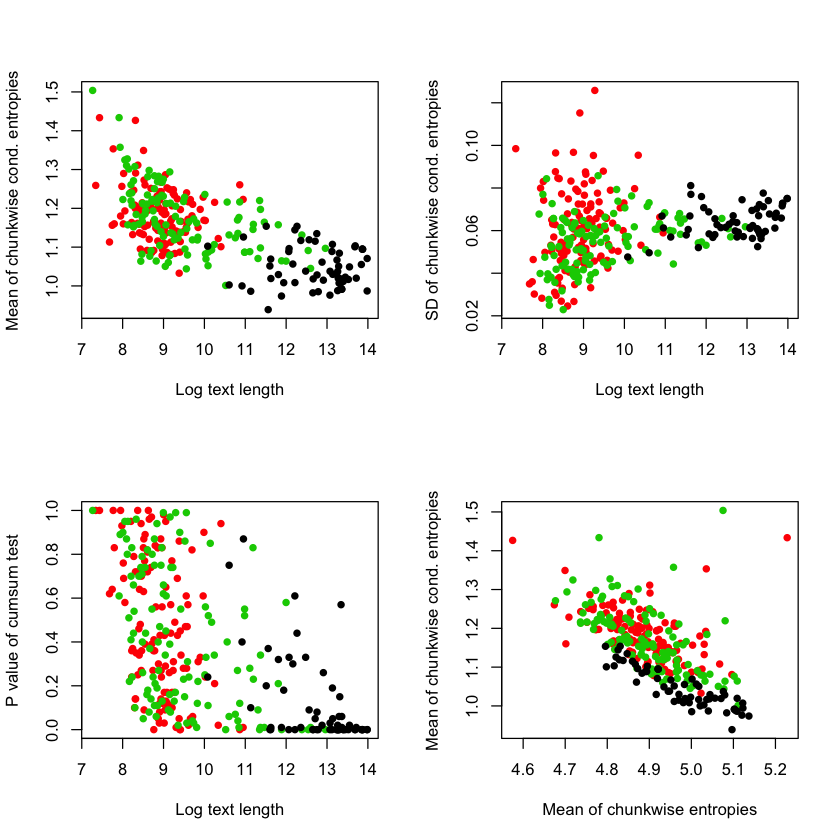

In [14]:
par(mfrow=c(2,2))
plot(log(features$textlength),features$con_ent_mean,pch=16,col=features$genre,xlab="Log text length",ylab="Mean of chunkwise cond. entropies")
plot(log(features$textlength),features$con_ent_sd,pch=16,col=features$genre,xlab="Log text length",ylab="SD of chunkwise cond. entropies")
plot(log(features$textlength),features$con_ent_cumsum,pch=16,col=features$genre,xlab="Log text length",ylab="P value of cumsum test")
plot(features$ent_mean,features$con_ent_mean,pch=16,col=features$genre,xlab="Mean of chunkwise entropies",ylab="Mean of chunkwise cond. entropies")

The correlations:

In [16]:
cor(log(features$textlength),features$con_ent_mean)

[1] -0.6615416

In [17]:
cor(log(features$textlength[features$genre=="Pop"]),features$con_ent_mean[features$genre=="Pop"])

[1] -0.04497751

In [18]:
cor(log(features$textlength[features$genre=="Romantic"]),features$con_ent_mean[features$genre=="Romantic"])

[1] -0.2220657

In [19]:
cor(log(features$textlength[features$genre=="SR"]),features$con_ent_mean[features$genre=="SR"])

[1] -0.5273071

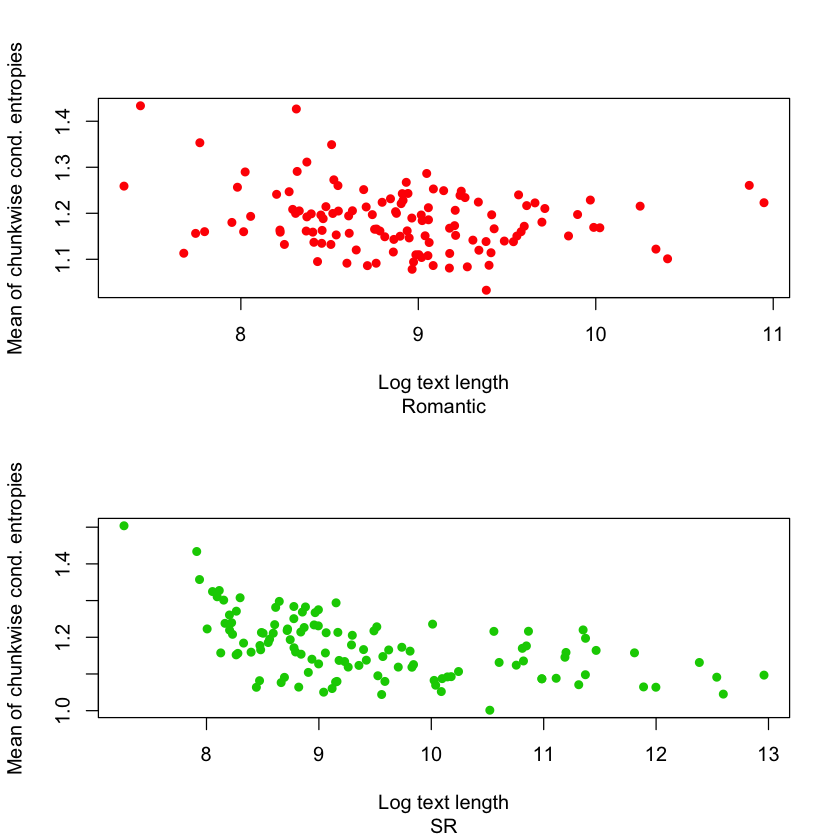

In [26]:
par(mfrow=c(2,1))
plot(log(features$textlength[features$genre=="Romantic"]),features$con_ent_mean[features$genre=="Romantic"],pch=16,col=features$genre[features$genre=="Romantic"],xlab="Log text length",ylab="Mean of chunkwise cond. entropies",sub="Romantic")
plot(log(features$textlength[features$genre=="SR"]),features$con_ent_mean[features$genre=="SR"],pch=16,col=features$genre[features$genre=="SR"],xlab="Log text length",ylab="Mean of chunkwise cond. entropies",sub="SR")

## Distance to the global vector

## Frequencies of thought words

## Frequencies of first and third pronouns

## KL score based on topic modeling

# Results

The following confusion matrix is computed using only the following features
- KL score
- Mean of TTRs
- Mean of entropies
- Mean of conditional entropies
- Frequencies of thought words
- Frequencies of first/third pronouns

and is based on 100 random split of the dataset into 90/10 for training and test.

In [29]:
load("~/github/NovelProject/confusion_ch")
confusion_ch

          pred
            Pop Romantic   SR
  Pop      6.16     0.03 0.81
  Romantic 0.57     8.72 3.71
  SR       0.35     3.73 7.92

The overall accuracy is

In [31]:
sum(diag(confusion_ch))/sum(confusion_ch)

[1] 0.7125

More to come on the model...

Another issue to be aware of is whether we are fitting is the genre or the author. It is worth taking a look if those we got correct among Romantic and SR are usually the authors in the training set or not. 